In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic') # 한글 폰트 설정
plt.rc('axes',unicode_minus=False) #폰트가 깨져서 설정

%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina') #선명하게 할려고
import folium

In [2]:
df = pd.read_csv("D:/jupyter/부스트코스/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv",encoding="UTF8", engine='python')

1. 언어치료는 시군구별로 어디에 많이 위치할까?<br>
2. 의료시설은 서울과 강남에 집중되어 있을까?<br>
3. 강남에는 피부과, 성형외과가 다른 지역에 비해 많을까?

In [3]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [4]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
상가업소번호       91335 non-null int64
상호명          91335 non-null object
지점명          1346 non-null object
상권업종대분류코드    91335 non-null object
상권업종대분류명     91335 non-null object
상권업종중분류코드    91335 non-null object
상권업종중분류명     91335 non-null object
상권업종소분류코드    91335 non-null object
상권업종소분류명     91335 non-null object
표준산업분류코드     86413 non-null object
표준산업분류명      86413 non-null object
시도코드         90956 non-null float64
시도명          90956 non-null object
시군구코드        90956 non-null float64
시군구명         90956 non-null object
행정동코드        91335 non-null int64
행정동명         90956 non-null object
법정동코드        91280 non-null float64
법정동명         91280 non-null object
지번코드         91335 non-null int64
대지구분코드       91335 non-null int64
대지구분명        91335 non-null object
지번본번지        91335 non-null int64
지번부번지        72079 non-null float64
지번주소         91335 non-null object
도로명코드        91335

In [6]:
df_lan=df.loc[(df["상권업종소분류명"]=="언어치료"),"시군구명"].value_counts()

In [7]:
df_lan.head()

서구         28
동구         23
북구         18
김해시        17
성남시 분당구    16
Name: 시군구명, dtype: int64

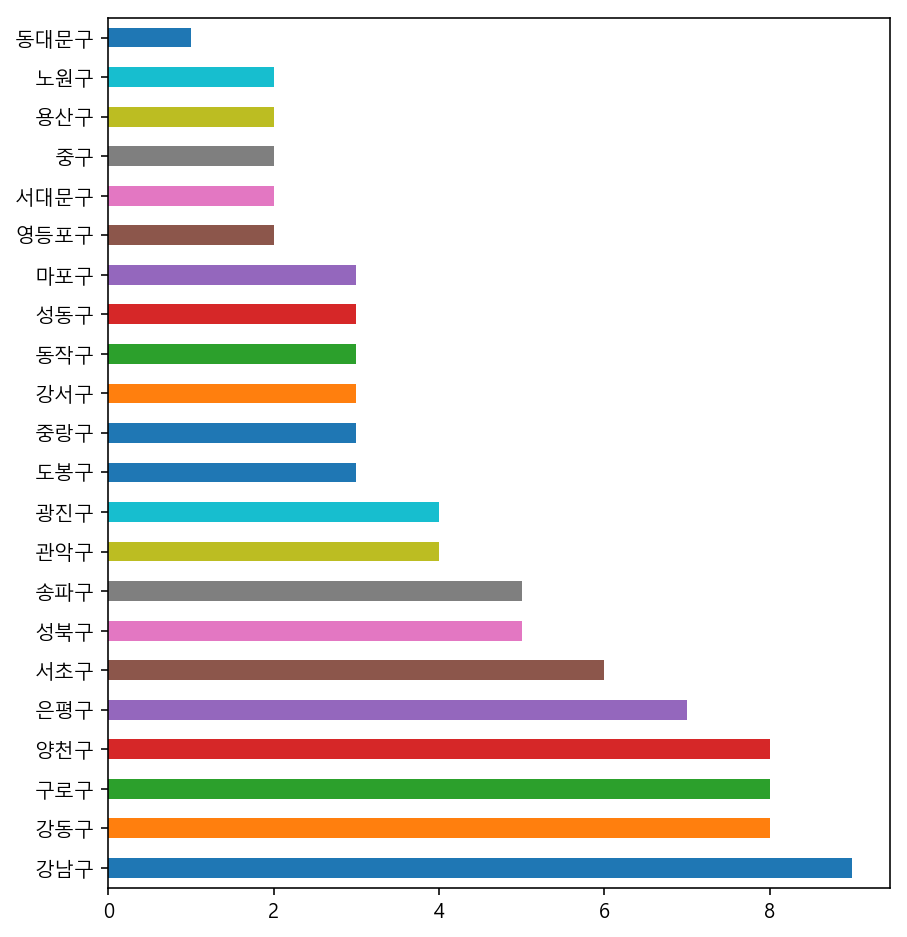

In [8]:
df_seoul_lan=df.loc[(df["상권업종소분류명"]=="언어치료")&(df["시도명"]=="서울특별시"),"시군구명"].value_counts()

df_seoul_lan.plot.barh(figsize=[7,8])

----

In [9]:
# 2. 의료시설은 서울과 강남에 집중되어 있을까?
# 2-1 서울 안에서 강남

In [10]:
df.loc[df["시도명"]=="서울특별시","시군구명"].value_counts().head()

강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
Name: 시군구명, dtype: int64

In [11]:
#2-2 전국에서
df["시도명"].value_counts().head()

경기도      21374
서울특별시    18943
부산광역시     6473
경상남도      4973
인천광역시     4722
Name: 시도명, dtype: int64

In [12]:
df.loc[df["시도명"]=="경기도","시군구명"].value_counts().head()

부천시        1657
성남시 분당구    1464
안양시 동안구     890
남양주시        837
안산시 단원구     829
Name: 시군구명, dtype: int64

3. 강남의 피부과, 성형외과가 다른지역에 비해 많을까??

# 강남구안에서 병원들의 비율
병원데이터 문제<br>
강남엔 피부과 성형외과가 다른 지역에 비해 많은가? 시군구별 피부과 성형외과가 차지하는 비율을 구해서 답하시오.

In [61]:
df1=df.loc[(df["상권업종소분류명"]=="피부과")|(df["상권업종소분류명"]=="정형/성형외과"),"시군구명"].value_counts()

In [62]:
df_1=df1.to_frame()

In [63]:
df_1.head()

,시군구명
강남구,603
서초구,200
서구,142
중구,118
성남시 분당구,101


In [64]:
df_2=df.loc[:,"시군구명"].value_counts()

In [65]:
df_2=df_2.to_frame()

In [66]:
df_2.head()

,시군구명
서구,3165
강남구,3120
남구,2994
중구,2724
북구,2359


In [67]:
df_1=df_1.reset_index()
df_2=df_2.reset_index()

In [70]:
df_total=pd.merge(df_2,df_1,on="index")
df_total.head()

,index,시군구명_x,시군구명_y
0,서구,3165,142
1,강남구,3120,603
2,남구,2994,91
3,중구,2724,118
4,북구,2359,63


In [71]:
df_total["피부성형외과 비율"]=df_total["시군구명_y"]/df_total["시군구명_x"]

In [72]:
df_total.head()

,index,시군구명_x,시군구명_y,피부성형외과 비율
0,서구,3165,142,0.044866
1,강남구,3120,603,0.193269
2,남구,2994,91,0.030394
3,중구,2724,118,0.043319
4,북구,2359,63,0.026706


In [73]:
df_total.rename(columns={'index':'시군구명','시군구명_x':'전체병원','시군구명_y':'피부/성형외과'},inplace=True)

In [74]:
df_total.head()

,시군구명,전체병원,피부/성형외과,피부성형외과 비율
0,서구,3165,142,0.044866
1,강남구,3120,603,0.193269
2,남구,2994,91,0.030394
3,중구,2724,118,0.043319
4,북구,2359,63,0.026706


In [76]:
df_total.sort_values(by="피부성형외과 비율",ascending=False).head()

,시군구명,전체병원,피부/성형외과,피부성형외과 비율
1,강남구,3120,603,0.193269
7,서초구,1491,200,0.134138
19,부산진구,870,77,0.088506
179,미추홀구,13,1,0.076923
26,수원시 팔달구,765,55,0.071895
